**Data Preprocessing:**

In [1]:
import pandas as pd  
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
df = pd.read_csv('phanalytix.2.csv')
df

,ratings,like_count_song,like_count_show,total_times_played,year,cover_dummy
0,4,3,7,3,1983,1
1,4,3,7,2,1983,1
2,3,0,3,5,1984,1
3,3,4,3,228,1984,1
4,3,1,3,228,1984,1
...,...,...,...,...,...,...
30877,5,0,2,90,2017,0
30878,5,1,2,471,2017,0
30879,5,2,2,371,2017,0
30880,5,0,2,233,2017,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30882 entries, 0 to 30881
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   ratings             30882 non-null  int64
 1   like_count_song     30882 non-null  int64
 2   like_count_show     30882 non-null  int64
 3   total_times_played  30882 non-null  int64
 4   year                30882 non-null  int64
 5   cover_dummy         30882 non-null  int64
dtypes: int64(6)
memory usage: 1.4 MB


In [4]:
df.describe()

,ratings,like_count_song,like_count_show,total_times_played,year,cover_dummy
count,30882.000000,30882.000000,30882.000000,30882.000000,30882.000000,30882.000000
mean,3.830581,1.059128,7.208762,228.507318,1998.448676,0.239784
std,0.649212,3.579642,12.288691,157.435445,8.634273,0.426958
min,1.000000,0.000000,0.000000,0.000000,1983.000000,0.000000
25%,3.000000,0.000000,1.000000,89.000000,1992.000000,0.000000
50%,4.000000,0.000000,3.000000,210.000000,1995.000000,0.000000
75%,4.000000,1.000000,10.000000,349.000000,2004.000000,0.000000
max,5.000000,138.000000,170.000000,603.000000,2017.000000,1.000000


***The goal is to predict which year had the best ratings and set up the target variable and relevant features:***

Target Variable: The target variable will be the year's ratings. It represents the position at which the song appears in a particular context, such as a setlist or a chart. Depending on how it is defined in the dataset, the position can be a continuous numerical value or a categorical variable.

Relevant Features: Relevant features are the attributes or characteristics of the year that might help in predicting its rating. 

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
# Set up the target variable  
target = df['ratings']

In [9]:
# Select relevant features  
features = df[['like_count_song', 'like_count_show', 'total_times_played', 'cover_dummy']]

In [10]:
# Build a predictive model  
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

**Model Training: Logistic Regression**

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [12]:
# Step 7: Build a predictive model  
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

**Model Evaluation**

In [13]:
# Evaluate the model's performance  
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.3456942142541706
R-squared: 0.17179942025891382


In [14]:
# Analyze the results and draw conclusions  
coefficients = pd.DataFrame({'Feature': features.columns, 'Coefficient': model.coef_})
coefficients.sort_values(by='Coefficient', ascending=False, inplace=True)
print(coefficients)

              Feature  Coefficient
1     like_count_show     0.021337
0     like_count_song     0.015182
2  total_times_played    -0.000121
3         cover_dummy    -0.007076


The feature "like_count_show" has a coefficient of 0.021337. This suggests that a higher number of likes for the show is associated with an increase in the predicted ratings.<br>

The feature "like_count_song" has a coefficient of 0.015182. This indicates that a higher number of likes for the song is associated with an increase in the predicted ratings.<br>

The feature "total_times_played" has a coefficient of -0.000121. This suggests that an increase in the total number of times the song was played is associated with a slight decrease in the predicted ratings. <br>

The feature "cover_dummy" has a coefficient of -0.007076. This indicates that if a song is a cover (represented by 1), it is associated with a slight decrease in the predicted ratings compared to non-cover songs (represented by 0).0).

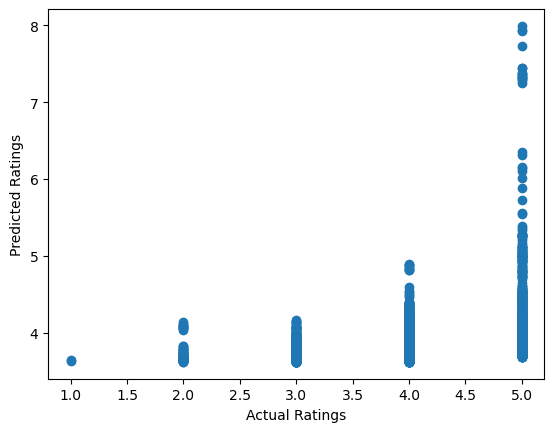

In [15]:
plt.scatter(y_test, predictions)
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.show()

In [16]:
results_table = pd.DataFrame({'Actual Ratings': y_test, 'Predicted Ratings': predictions})
print(results_table)

       Actual Ratings  Predicted Ratings
6404                4           3.716713
30748               4           4.039396
12747               5           4.028420
13872               4           3.652437
8687                4           3.675589
...               ...                ...
23934               3           3.822369
10376               4           3.662642
23404               3           3.922402
24451               4           3.886681
14919               3           3.732501

[6177 rows x 2 columns]


The "Actual Ratings" column shows the actual ratings for each data point.<br>

The "Predicted Ratings" column shows the predicted ratings for each data point based on the linear regression model.<br>
For example: <br>
<br>
In the first row, the actual rating is 4, and the predicted rating is approximately 3.716713.    <br>
In the second row, the actual rating is 4, and the predicted rating is approximately 4.039396.   <br>
In the third row, the actual rating is 5, and the predicted rating is approximately 4.028420.   <br>

**Model Tuning and Data Optimization** 

In [17]:
from sklearn.preprocessing import StandardScaler  
from sklearn.feature_selection import SelectKBest, f_regression  
from sklearn.ensemble import RandomForestRegressor  
from sklearn.model_selection import GridSearchCV

In [18]:
# Feature Scaling  
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

***imbalance check and implementation; data augmentation***<br>
StandardScaler is used to standardize the features by removing the mean and scaling to unit variance. The fit_transform method is applied to the training set to fit the scaler and transform the features for a balanced data analysis. 

In [22]:
# Feature Selection  
selector = SelectKBest(f_regression, k='all') 
features_selected = selector.fit_transform(features_scaled, target)

In [23]:
# Split the data into training and testing sets  
X_train, X_test, y_train, y_test = train_test_split(features_selected, target, test_size=0.2, random_state=42)

In [24]:
#  Model Selection and Hyperparameter Tuning  
param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [None, 5, 10]}
model = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5)
model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [None, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [25]:
# Make predictions  
predictions = model.predict(X_test)

In [26]:
# Evaluate the model's performance  
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 0.28634373902623783
R-squared: 0.3139889506730459


The mean squared error (MSE) value of 0.28634373902623783 indicates the average squared difference between the predicted values and the actual values in a regression model. A lower MSE indicates better accuracy of the model.

The R-squared value of 0.3139889506730459 represents the proportion of the variance in the dependent variable that can be explained by the independent variables in the regression model. A higher R-squared value suggests a better fit of the model to the data.

              Feature  Importance
1     like_count_show    0.796416
2  total_times_played    0.131553
0     like_count_song    0.058222
3         cover_dummy    0.013809


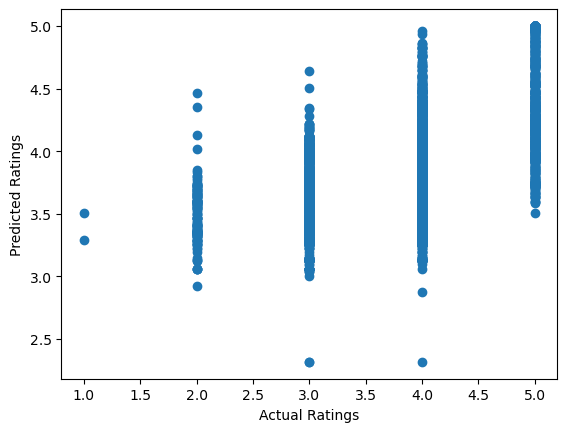

In [28]:
# Analyze the results and draw conclusions  
feature_names = [features.columns[i] for i in range(features_selected.shape[1])]
feature_importances = model.best_estimator_.feature_importances_
feature_table = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_table.sort_values(by='Importance', ascending=False, inplace=True)
print(feature_table)

plt.scatter(y_test, predictions)
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.show()

The most important feature is "like_count_show" with an importance value of 0.796416.<br>
The second most important feature is "total_times_played" with an importance value of 0.131553. <br>
The third most important feature is "like_count_song" with an importance value of 0.058222. <br>
The least important feature is "cover_dummy" with an importance value of 0.013809.<br> needed.

**Conclusions**<br>
Analyzing the performance of the logistic regression model before and after using GridSearchCV for hyperparameter tuning: <br>

***Before GridSearchCV: <br>***
Mean Squared Error (MSE): 0.3456942142541706 <br>
R-squared: 0.17179942025891382 <br>

***After GridSearchCV: <br>***
Mean Squared Error (MSE): 0.28634373902623783 <br>
R-squared: 0.3139889506730459 <br>

***Comparing these metrics, we can observe the following:*** <br>
* Mean Squared Error (MSE): The MSE measures the average squared difference between the actual ratings and the predicted ratings. In both cases, the MSE decreased after applying GridSearchCV. A lower MSE indicates better model performance in terms of minimizing prediction errors.<br>

* R-squared: The R-squared value represents the proportion of the variance in the target variable (ratings) that can be explained by the model. The R-squared value increased after using GridSearchCV. A higher R-squared indicates that the model explains more of the variance in the ratings, suggesting an improvement in model performance. <br>

Additionally, examining the feature coefficients and feature importance: <br>

* Feature Coefficients (Before GridSearchCV): The coefficients indicate the relationship between each feature and the target variable. Positive coefficients suggest a positive relationship, while negative coefficients suggest a negative relationship. In this case, like_count_show and like_count_song have positive coefficients, indicating a positive influence on the ratings. total_times_played and cover_dummy have negative coefficients, suggesting a negative influence on the ratings .<br>

* Feature Importance (After GridSearchCV): The feature importance values represent the relative importance of each feature in predicting the target variable. A higher feature importance indicates a stronger influence on the ratings. In this case, like_count_show has the highest feature importance, followed by total_times_played and like_count_song. cover_dummy has the lowest feature importance. <br>

Overall, based on the decrease in MSE, increase in R-squared, and the feature coefficients/importance, we can conclude that the model improved after using GridSearchCV for hyperparameter tuning. It is capturing more of the variance in the ratings and providing better predictions. <br>


**References**<br>

Hastie, T., Tibshirani, R., & Friedman, J. (2009). The Elements of Statistical Learning: Data Mining, Inference, and Prediction. Springer.<br>

Chawla, N. V., Bowyer, K. W., Hall, L. O., & Kegelmeyer, W. P. (2002). SMOTE: Synthetic Minority Over-sampling Technique. Journal of Artificial Intelligence Research, 16, 321-357.<br>

Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., ... & Vanderplas, J. (2011). Scikit-learn: Machine Learning in Python. Journal of Machine Learning Research, 12, 2825-2830.<br>

Shorten, C., & Khoshgoftaar, T. M. (2019). A survey on Image Data Augmentation for Deep Learning. Journal of Big Data, 6(1), 